# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('D5data1.csv')

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
x =dataset.iloc[:,:-1].values

In [9]:
y = dataset.iloc[:,-1].values

In [16]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Splitting the dataset into training and testing data 

In [17]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Predicting Test data

In [29]:
y_pred = regressor.predict(x_test)

In [30]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

## Visualising Training dataset 

Text(0.5, 1.0, 'Salary vs Experience')

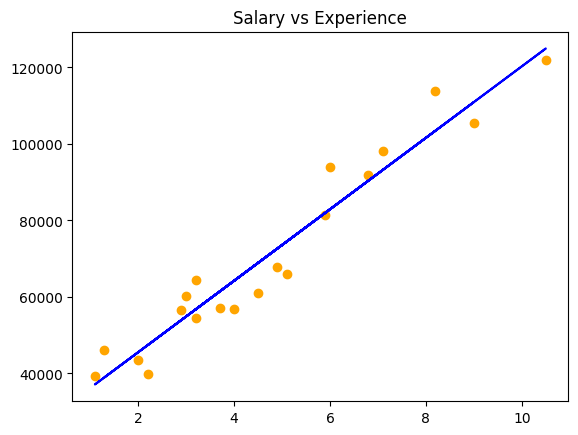

In [35]:
plt.scatter(x_train,y_train,color = 'orange')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary vs Experience')

## Visualising Testing dataset 

Text(0.5, 1.0, 'Salary vs Experience')

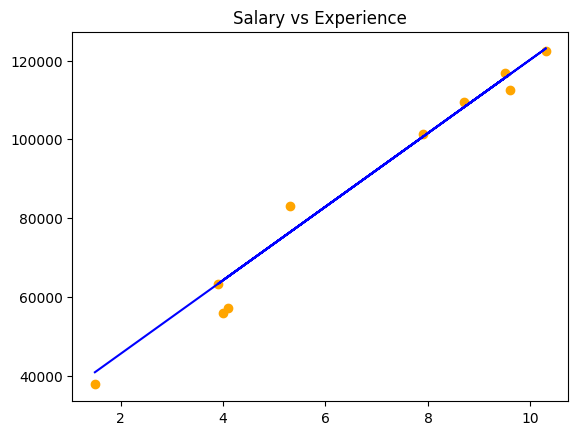

In [38]:
plt.scatter(x_test,y_test,color = 'orange')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.title('Salary vs Experience')

In [39]:
# Regression ocoefficient
b = regressor.coef_
b

array([9345.94244312])

In [41]:
#y intercept

a = regressor.intercept_
a

26816.192244031183

In [42]:
# Prediction 
print(regressor.predict([[31]]))

[316540.40798082]


In [50]:
# Mean Square Error MSE
from sklearn import metrics

In [51]:
metrics.mean_squared_error(y_test,y_pred)

21026037.329511296

In [52]:
import statsmodels.api as sm

In [53]:
x_stats = sm.add_constant(x_train)

In [54]:
mod1 = sm.OLS(y_train,x_stats).fit()

In [56]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     273.2
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           2.51e-12
Time:                        11:57:50   Log-Likelihood:                -202.60
No. Observations:                  20   AIC:                             409.2
Df Residuals:                      18   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.682e+04   3033.148      8.841      0.000    2.04e+04    3.32e+04
x1          9345.9424    565.420     16.529      0.000    8158.040    1.05e+04
==============================================================================
Omnibus:                        2.688   Durbin-Watson:                   2.684
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.386
Skew:                           0.305   Prob(JB):                        0.500
Kurtosis:                       1.864   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple linear regression

In [57]:
df = pd.read_csv("D5data2.csv")

In [58]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [59]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [61]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [81]:
# Independent variable
x = df.iloc[:,:-1].values

In [82]:
# dependent
y = df.iloc[:,-1].values

LinearRegression()

In [84]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [86]:
ct = ColumnTransformer(transformers = [('encode',OneHotEncoder(),[3])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [89]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred = reg.predict(x_test)

y_pred

array([103015.20159796, 132582.27760815, 132447.73845174,  71976.09851258,
       178537.48221056, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569551])

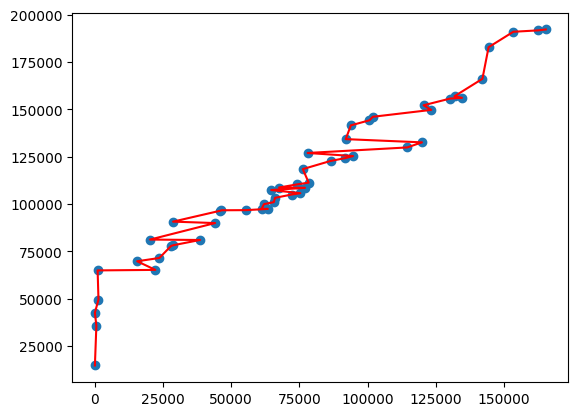

In [91]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.plot(df['R&D Spend'],df['Profit'],color='red')

# Polynomial Regression

In [92]:
df = pd.read_csv('D5data4.csv')

In [93]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [97]:
x = df.iloc[:,:-1].values

In [98]:
y = df.iloc[:,-1].values

In [99]:
x

array([['Business Analyst', 1],
       ['Junior Consultant', 2],
       ['Senior Consultant', 3],
       ['Manager', 4],
       ['Country Manager', 5],
       ['Region Manager', 6],
       ['Partner', 7],
       ['Senior Partner', 8],
       ['C-level', 9],
       ['CEO', 10]], dtype=object)

In [100]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)